In [256]:
import itertools
import random
import math
import matplotlib.pyplot as plt  # type: ignore
import geopandas as gpd  # type: ignore

In [257]:
# Data from data.py
##Defining the towns
location_names = [
    "Windhoek", "Swakopmund", "Walvis Bay", "Otjiwarongo", "Tsumeb",
    "Grootfontein", "Mariental", "Keetmanshoop", "Ondangwa", "Oshakati"
]

In [258]:
## Contains the distance data matrix for the towns.
distance_data = [
    [0, 361, 395, 249, 433, 459, 268, 497, 678, 712],
    [361, 0, 35.5, 379, 562, 589, 541, 859, 808, 779],
    [395, 35.5, 0, 413, 597, 623, 511, 732, 884, 855],
    [249, 379, 413, 0, 260, 183, 519, 768, 514, 485],
    [433, 562, 597, 260, 0, 60, 682, 921, 254, 288],
    [459, 589, 623, 183, 60, 0, 708, 947, 308, 342],
    [268, 541, 511, 519, 682, 708, 0, 231, 909, 981],
    [497, 859, 732, 768, 921, 947, 231, 0, 1175, 1210],
    [678, 808, 884, 514, 254, 308, 909, 1175, 0, 30],
    [712, 779, 855, 485, 288, 342, 981, 1210, 30, 0]
]

In [259]:
# TSP class from tsp.py
## Creating the TSP class to store location_names, distances and total route distance.
class TSP:
    def __init__(self, location_names, distance_data):
        
        ##Initializing town names with their respective distance data.
        
        self.locations = location_names
        self.distances = distance_data

    def calculate_total_cost(self, path):
        
        
    ## Calculating total round-trip distance of a given path
        total_cost = 0
        for i in range(len(path)):
            origin = path[i]
            destination = path[(i + 1) % len(path)]  # loop back to start
            total_cost += self.distances[origin][destination]
        return total_cost

    def path_cost(self, path):
        
        ##Calculating  the total distance of a path.
        
        total = 0
        for i in range(len(path)):
            start = path[i]
            end = path[(i + 1) % len(path)]
            total += self.distances[start][end]
        return total

    def path_to_names(self, path):
        
        
        return [self.locations[i] for i in path]

In [260]:
# SimulatedAnnealingEngine class from simulated_annealing.py
class SimulatedAnnealingEngine:
    def __init__(self, tsp_small, initial_temp=10000, cooling_rate=0.003, max_iter=10000):
        self.tsp = tsp_small
        self.temperature = initial_temp
        self.cooling_rate = cooling_rate
        self.max_iterations = max_iter

    def generate_initial_path(self):
        ##Generating a random initial path
        path = list(range(len(self.tsp.locations)))
        random.shuffle(path)
        return path

    def swap_cities(self, path):
        ##Swapping two towns
        new_path = path[:]
        i, j = random.sample(range(len(new_path)), 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        return new_path

    def acceptance_function(self, current_cost, new_cost, temperature):
        ##Probability function to accept/reject based on temperature
        if new_cost < current_cost:
            return 1.0
        return math.exp((current_cost - new_cost) / temperature)

    def cool_down(self, t):
        ## Implementing a cooling schedule (exponential decay)
        return t * (1 - self.cooling_rate)

    def solve(self):
        ##Running the simulated annealing algorithm
        current_route = self.generate_initial_path()
        current_distance = self.tsp.calculate_total_cost(current_route)

        best_route = current_route[:]
        best_distance = current_distance

        temperature = self.temperature
        iteration = 0

        while temperature > 1 and iteration < self.max_iterations:
            new_route = self.swap_cities(current_route)
            new_distance = self.tsp.calculate_total_cost(new_route)

            if self.acceptance_function(current_distance, new_distance, temperature) > random.random():
                current_route = new_route
                current_distance = new_distance

                if new_distance < best_distance:
                    best_route = new_route
                    best_distance = new_distance

            temperature = self.cool_down(temperature)
            iteration += 1
       ## Returns best route
        return best_route, best_distance

In [261]:
# Functions and code from analysis.py
def brutel_force_tsp(tsp):
    best_route = None
    best_distance = float('inf')
    indices = list(range(len(tsp.locations)))

    for perm in itertools.permutations(indices[1:]): 
        route = [0] + list(perm)
        distance = tsp.path_cost(route)
        if distance < best_distance:
            best_distance = distance
            best_route = route
    return best_route, best_distance

In [262]:
def run_analysis():
    # Using a subset of 4 towns to test and  keep brute force feasible
    locations_small_towns = ["Windhoek", "Swakopmund", "Walvis Bay", "Otjiwarongo"]
    small_distance_data = [
        [0, 361, 395, 249],      # Windhoek
        [361, 0, 35.5, 379],       # Swakopmund
        [395, 35.5, 0, 413],       # Walvis Bay
        [249, 379, 413, 0],      # Otjiwarongo
    ]

    tsp_small = TSP(locations_small_towns, small_distance_data)

    # Brute force algorithm
    brute_route, brute_distance = brutel_force_tsp(tsp_small)
    brute_named = [tsp_small.locations[i] for i in brute_route]
    print("Brute Force Best Route:", brute_named)
    print("Brute Force Distance:", brute_distance)

    # Simulated annealing algorithm
    solver = SimulatedAnnealingEngine(tsp_small, initial_temp=1000, cooling_rate=0.995, max_iter=5000)
    sa_route, sa_distance = solver.solve()
    sa_named = [tsp_small.locations[i] for i in sa_route]
    print("\nSimulated Annealing Route:", sa_named)
    print("Simulated Annealing Distance:", sa_distance)

In [263]:
# Code from run_solver.py
def run_solver():
    tsp = TSP(location_names, distance_data)
    solver = SimulatedAnnealingEngine(tsp)
    best_route, best_distance = solver.solve()

    print("Best Route Found:")
    print(tsp.path_to_names(best_route))
    print("Total Distance:", best_distance)

    print("\n Parameter Experiment")

    
 ##Adjusting parameters
    configs = [
        ("Low Temp (1000)", 1000, 0.003, 10000),
        ("High Temp (20000)", 20000, 0.003, 10000),
        ("Fast Cooling (0.01)", 10000, 0.01, 10000),
        ("Slow Cooling (0.0005)", 10000, 0.0005, 10000),
        ("Low Iteration", 10000, 0.003, 1000),
    ]

    for label, temp, rate, iters in configs:
        solver = SimulatedAnnealingEngine(tsp_small=tsp, initial_temp=temp, cooling_rate=rate, max_iter=iters)
        route, dist = solver.solve()
        print(f"\n{label}")
        print(f"Best Distance: {dist:.2f} km")
        print(f"Route: {tsp.path_to_names(route)}")

In [264]:
# Code from geo_visualization.py
## Implementing real coordinates of the towns for better visaulization and efficiency.
town_coords_geo = {
    "Windhoek": (-22.563810177981228, 17.068286781316083),
    "Swakopmund": (-22.67226200926268, 14.533030049061523),
    "Walvis Bay": (-22.958143076001573, 14.50103274060198),
    "Otjiwarongo": (-20.46009984448628, 16.6505301540919),
    "Tsumeb": (-19.243574340402155, 17.726379658235447),
    "Grootfontein": (-19.57328836061895, 18.10349349179784),
    "Mariental": (-24.62804891578338, 17.96273125802594),
    "Keetmanshoop": (-26.576678063398436, 18.132535230168745),
    "Ondangwa": (-17.90407050464377, 15.975235581089311),
    "Oshakati": (-17.788760956315514, 15.703925852222257),
}

In [265]:
def run_geo_visualization():
    # Loading Namibian map
    gdf = gpd.read_file(r"C:\Users\Helena Jeremiah\Downloads\gadm40_NAM_shp\gadm40_NAM_0.shp")

    tsp = TSP(location_names, distance_data)
    solver = SimulatedAnnealingEngine(tsp)
    route, distance = solver.solve()
    print(f"Route: {tsp.path_to_names(route)}")

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='beige', edgecolor='black')
    ax.set_title("Tuafeni's Journey Across Namibia", fontsize=14)

    ## Plotting the towns
    for i in range(len(route)):
        town = tsp.locations[route[i]]
        lat, lon = town_coords_geo[town]
        ax.plot(lon, lat, 'bo')
        ax.text(lon + 0.1, lat, town, fontsize=9)
        
## Drawing path
    path_lons = [town_coords_geo[tsp.locations[i]][1] for i in route + [route[0]]]
    path_lats = [town_coords_geo[tsp.locations[i]][0] for i in route + [route[0]]]
    ax.plot(path_lons, path_lats, color='red', linewidth=2, label=f"Total Distance: {distance:.1f} km")

    plt.legend()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

In [266]:
# Code from visualize_routes.py
## Coordinates for spacing out the towns for plotting
town_coords_vis = {
    "Windhoek": (0, 0),
    "Swakopmund": (-3, -2),
    "Walvis Bay": (-4, -4),
    "Otjiwarongo": (2, 4),
    "Tsumeb": (4, 6),
    "Grootfontein": (5, 8),
    "Mariental": (0, -5),
    "Keetmanshoop": (1, -8),
    "Ondangwa": (6, 10),
    "Oshakati": (7, 11),
}

In [267]:
## Facilitator to get full coordinates for a full path
def locate_coordinates(route, tsp):
    return [town_coords_vis[tsp.locations[i]] for i in route] + [town_coords_vis[tsp.locations[route[0]]]]

In [268]:
## Facilitator to help plot a route
def plot_route(ax, route, tsp, title, color):
    coords = locate_coordinates(route, tsp)
    x, y = zip(*coords)
    ax.plot(x, y, marker='o', color=color)
    for i, town_index in enumerate(route):
        town = tsp.locations[town_index]
        tx, ty = town_coords_vis[town]
        ax.text(tx, ty + 0.3, town, fontsize=9, ha='center')
    ax.set_title(title)
    ax.axis("equal")

In [269]:
def run_visualize_routes():
    tsp = TSP(location_names, distance_data)
    solver = SimulatedAnnealingEngine(tsp)

    ## Storing intial random route
    initial_route = list(range(len(location_names)))
    random.shuffle(initial_route)
    initial_distance = tsp.calculate_total_cost(initial_route)

    best_route, best_distance = solver.solve()
    
  ##Outputting
    print("Tuafeni's Journey ")
    print("Initial Route:", tsp.path_to_names(initial_route))
    print("Initial Distance:", initial_distance)
    print("\nFinal Optimized Route:", tsp.path_to_names(best_route))
    print("Final Distance:", best_distance)

    ##Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    plot_route(ax1, initial_route, tsp, f"Initial Route\n({initial_distance:.1f} km)", 'red')
    plot_route(ax2, best_route, tsp, f"Optimized Route\n({best_distance:.1f} km)", 'green')
    fig.suptitle("Tuafeni's TSP Journey Across Namibia", fontsize=14)
    plt.tight_layout()
    plt.show()

Running analysis
Brute Force Best Route: ['Windhoek', 'Swakopmund', 'Walvis Bay', 'Otjiwarongo']
Brute Force Distance: 1058.5

Simulated Annealing Route: ['Walvis Bay', 'Swakopmund', 'Windhoek', 'Otjiwarongo']
Simulated Annealing Distance: 1058.5

Running solver
Best Route Found:
['Ondangwa', 'Oshakati', 'Swakopmund', 'Walvis Bay', 'Keetmanshoop', 'Mariental', 'Windhoek', 'Otjiwarongo', 'Grootfontein', 'Tsumeb']
Total Distance: 2821.5

 Parameter Experiment

Low Temp (1000)
Best Distance: 2821.50 km
Route: ['Mariental', 'Windhoek', 'Otjiwarongo', 'Grootfontein', 'Tsumeb', 'Ondangwa', 'Oshakati', 'Swakopmund', 'Walvis Bay', 'Keetmanshoop']

High Temp (20000)
Best Distance: 2821.50 km
Route: ['Keetmanshoop', 'Mariental', 'Windhoek', 'Otjiwarongo', 'Grootfontein', 'Tsumeb', 'Ondangwa', 'Oshakati', 'Swakopmund', 'Walvis Bay']

Fast Cooling (0.01)
Best Distance: 2884.50 km
Route: ['Tsumeb', 'Ondangwa', 'Oshakati', 'Windhoek', 'Mariental', 'Keetmanshoop', 'Walvis Bay', 'Swakopmund', 'Otjiwar

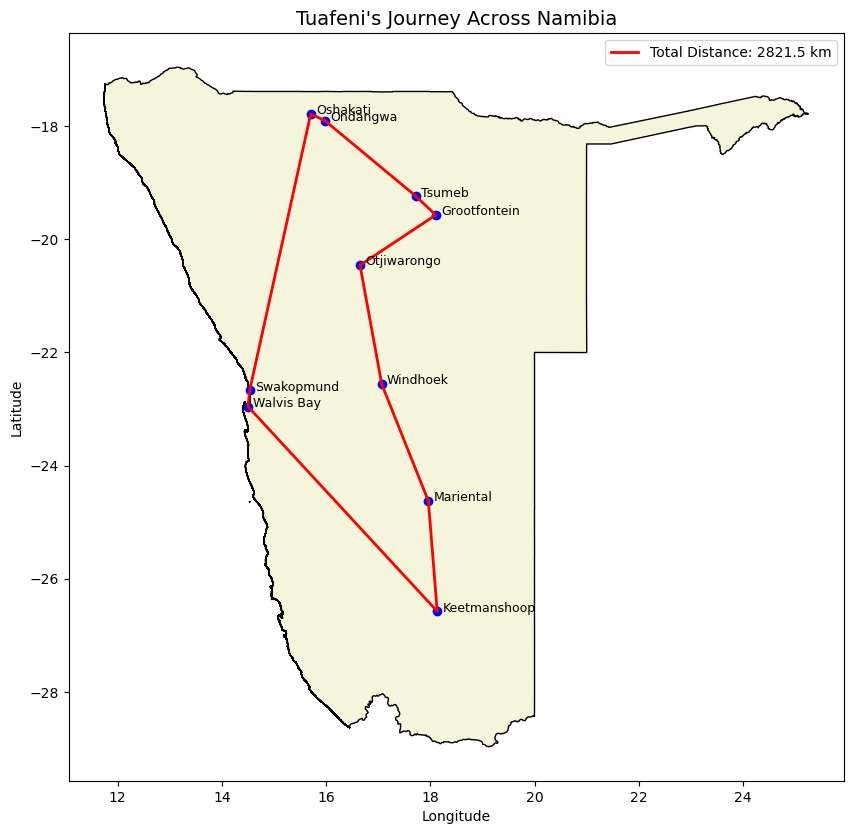


Running route visualization
Tuafeni's Journey 
Initial Route: ['Walvis Bay', 'Mariental', 'Otjiwarongo', 'Ondangwa', 'Keetmanshoop', 'Tsumeb', 'Windhoek', 'Swakopmund', 'Oshakati', 'Grootfontein']
Initial Distance: 6178

Final Optimized Route: ['Tsumeb', 'Grootfontein', 'Otjiwarongo', 'Windhoek', 'Mariental', 'Keetmanshoop', 'Walvis Bay', 'Swakopmund', 'Oshakati', 'Ondangwa']
Final Distance: 2821.5


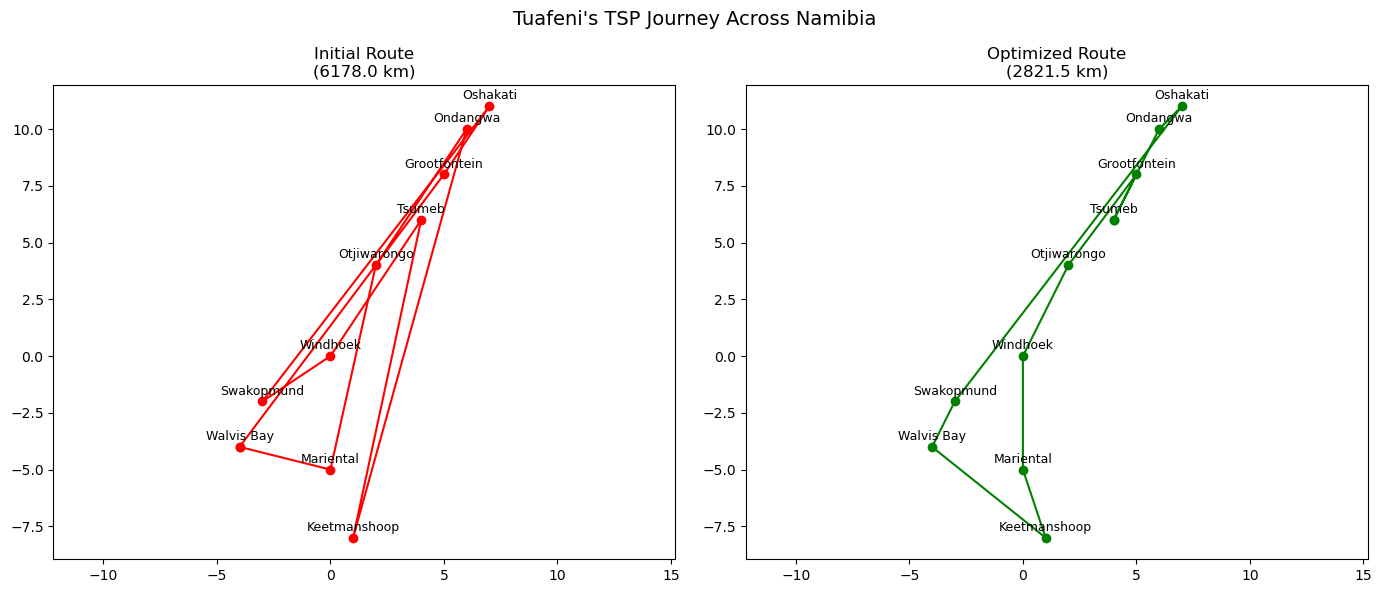

In [270]:
if __name__ == "__main__":
    print("Running analysis")
    run_analysis()
    print("\nRunning solver")
    run_solver()
    print("\nRunning Real Geographical visualization")
    run_geo_visualization()
    print("\nRunning route visualization")
    run_visualize_routes()

In [271]:
##Analysis and Evaluation

###  Brute Force vs Simulated Annealing
##We took a small town subset (Windhoek, Swakopmund, Otjiwarongo, Tsumeb) to test both algorithms.

 ##Brute-force found a true optimal route with a total distance of 1058.5 km
 ##Simulated Annealing found a different route but got the same results as brute- force with a distance of 1058.5 km.
##Indicating the effectiveness of Simulated Annealing and its ability to match the accuracy of Brute- Force algorithm without checking all  possible combinations.


###  Adjusting Parameters 
##We ran  experiments with different configurations to observe how changes in temperature, iteration count, and cooling rate affected our results :
## During our time tunning the parameters we got the following best distance for each configuration:
##Configuration	       Temperature	Cooling Rate	Iterations	   Best Distance (km)    	Verdict
##Low Temp (1000)	    1000	    0.003	        10000	        2821.50	                It gave a Good result, but there was  less exploration in the early steps.
##High Temp (20000)     20000	    0.003	        10000	        2884.50	                There were too much occurrence of randomness leading to  slower convergence.
##Fast Cooling (0.01)	10000	    0.01	        10000	        2884.50	                This resulted in less exploration because it cooled too quickly , missing good routes.
##Slow Cooling (0.0005)	10000	    0.0005	        10000	        2821.50	                This one came with the best performance, slow cooling helps find better paths.
##Low Iteration (1000)	10000	    0.003	        1000	        3137.50	                Far by the worse solution, stopping quite early, resulting in less chances for improvement.

## We later on  found the Best configuration settings (Temperature = 1000,Cooling Rate = 0.0005,Iterations = 10000) worked well. Finding the best route of 2821.5 km.

###  Will This Work for a Larger list of towns?
##Yes, however brute force will experience limitations when adding more towns due to the factorial growth.
##On the other hand Simulated Annealing remains more efficient and scalable with even 50 + cities, making it a great match  for real logistics like Tuafeni’s journey across Namibia.

In [272]:
### Upgraded Visualisation with GeoPandas

##We used real coordinates and shapefiles to plot Tuafeni’s journey on a real map of Namibia.

##This displays:
## The actual geographic route of the journey.
## That the  travel path is efficient
##Simulated Annealing's ability to adapt to real-world distances.

##This upgrade makes our solution ready for logistics apps, delivery systems, or road trip planners.
